# Devoir 6 : TALN

In [2]:
#!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d45168c4d26b0eb266aa8054d55b03b807c6709a94809b102721db682df9d63c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from nlp_code import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ce devoir a pour objectif de vous aider à comprendre certains des fondamentaux du Traitement Automatique du Langage Naturel (TALN) qui ont été étudiés dans le cours. Vous devrez compléter le code de base trouvé dans le fichier "nlp_code.py", effectuer certaines tâches dans ce notebook Jupyter et rédiger un rapport sur certaines des sections.


## Tâche 1 : Préparation des données et Exploration initiale

1-. Nous allons travailler sur l'ensemble de données "Critiques de films IMDb".

2-. En utilisant pandas :

> 2.1-. Nous chargerons l'ensemble de données dans le notebook Jupyter.
  
3-. Nous examinerons l'ensemble de données et vérifierons les points suivants (**Incluez les réponses pour les points suivants sous le titre "Section 1 - Point 3"**) :
* Nombre de points de données (?)
* Combien de valeurs uniques contient notre colonne cible ?
* Contient-elle des valeurs NaN ?
* Y a-t-il des critiques en double ? (si vous trouvez des lignes en double, combien de doublons avez-vous trouvés ?)


In [2]:
# Ne modifiez pas cette cellule
np.random.seed(42)

In [ ]:
# Chemin vers notre ensemble de données :
fichier = 'data/IMDB_dataset.csv'

In [ ]:
# Chargement de notre ensemble de données :
df = pd.read_csv(fichier)

In [ ]:
# Votre code ici

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
np.unique(df["sentiment"])

array(['negative', 'positive'], dtype=object)

In [ ]:
# Vérifier les valeurs NaN
nan_values = df.isna().sum()

# Vérifier les critiques en double
duplicate_reviews = df.duplicated('review').sum()

print(f'NaN :\n{nan_values}')
print(f'\nDoublons :\n{duplicate_reviews}')


NaN :
review       0
sentiment    0
dtype: int64

Doublons :
418


Si vous avez trouvé des doublons, supprimez-les de l'ensemble de données.

In [ ]:
# Votre code ici
# Suppression des doublons en conservant la première occurrence
df = df.drop_duplicates(subset='review', keep='first')

Assurez-vous que nous traitons des critiques uniques.

In [ ]:
# Votre code ici

# Vérifier les critiques en double
df.duplicated('review').sum()

0

# Tâche 2 : Prétraitement des données

Dans cette tâche, nous préparerons notre ensemble de données pour une analyse exploratoire des données (AED/EDA (Anglais)).

1-. Complétez la fonction `preprocess_text` contenue dans `nlp_code.py`. Cette fonction prend une critique (chaîne de caractères) en entrée et devrait renvoyer une version propre de la critique sans : balises HTML, signes de ponctuation, stopwords courants et jetons vides. De plus, tous les mots doivent être en minuscules et lemmatisés.

2-. Créez un nouveau DataFrame appelé `clean_df` avec les colonnes `clean_review` et `sentiment`. Vous devriez appliquer la fonction `preprocess_text` à toutes les critiques originales et stocker les critiques nettoyées dans la colonne `clean_review`.

3-. Affichez dans une nouvelle cellule les 5 premiers éléments de notre nouveau DataFrame.

In [ ]:
# Complétez les points 2 et 3 dans les cellules suivantes.

In [ ]:
# Appliquer la fonction preprocess_text à la colonne 'review'
clean_reviews = df['review'].apply(preprocess_text)

In [ ]:
clean_reviews

0        one reviewer mentioned watching 1 oz episode h...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter love time money visually stunning film ...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 49582, dtype: object

In [ ]:
# Créer un nouveau DataFrame avec clean_review et sentiment
clean_df = pd.DataFrame({
    'clean_review': clean_reviews,
    'sentiment': df['sentiment']
})

In [ ]:
# Afficher les 5 premières lignes du nouveau DataFrame
clean_df.head()

,clean_review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter love time money visually stunning film ...,positive


In [ ]:
review_lengths(clean_df['clean_review'])

0        163
1         84
2         84
3         66
4        122
        ... 
49995     80
49996     56
49997    108
49998    110
49999     66
Name: clean_review, Length: 49582, dtype: int64

# Tâche 3 : Analyse exploratoire des données (AED)

Dans cette section, nous réaliserons une EDA de base sur notre ensemble de données prétraité. Cela va nous aider à répondre aux questions suivantes :

* Comment les valeurs cibles sont-elles distribuées ? Avons-nous un ensemble de données presque équilibré ?
* Toutes les critiques ont-elles la même longueur ?
* Quelle est la longueur moyenne des séquences ?
* Quels sont les 20 mots les plus fréquents ?
* Quels sont les 20 mots les moins fréquents ?
* Après avoir effectué une AED, pensez-vous qu'il sera facile de classifier ces critiques ? Pourquoi oui ? Pourquoi non ? **[Discussion]**

1-. En utilisant matplotlib et seaborn (utilisez un count plot), tracez le décompte total des étiquettes cibles. Nous voulons voir s'ils sont à peu près équilibrés ou si nous avons affaire à un ensemble de données fortement déséquilibré. Vous pouvez également appuyer votre analyse en calculant les décomptes pour chaque étiquette.

2-. En utilisant matplotlib et seaborn (utilisez un histogramme), tracez les longueurs des séquences de nos critiques (celles stockées dans la colonne `clean_review`). Pour ce faire, vous devrez compléter la fonction `review_lengths` dans le fichier `nlp_code.py`. Cette fonction prend la colonne `clean_review` comme entrée et renvoie une pd.Series des longueurs de séquence de chaque critique prétraitée.

3-. En utilisant matplotlib et seaborn (utilisez un histogramme, trouvez une orientation qui nous aide à voir clairement la différence de fréquences), tracez les 20 mots les plus fréquents, puis tracez les 20 mots les moins fréquents. Pour ce faire, vous devrez compléter la fonction `word_frequency` dans le fichier `nlp_code.py`. Cette fonction prend la colonne `clean_review` comme entrée et renvoie une pd.Series avec la longueur de séquence de chaque critique prétraitée.

**Dans votre rapport, vous devez répondre aux questions de la cellule précédente et les étayer avec vos graphiques générés et votre analyse. Développez suffisamment la question pour montrer votre compréhension de l'ensemble de données.**

### 3.1 Distribution des valeurs cibles

In [ ]:
# Votre code ici

/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


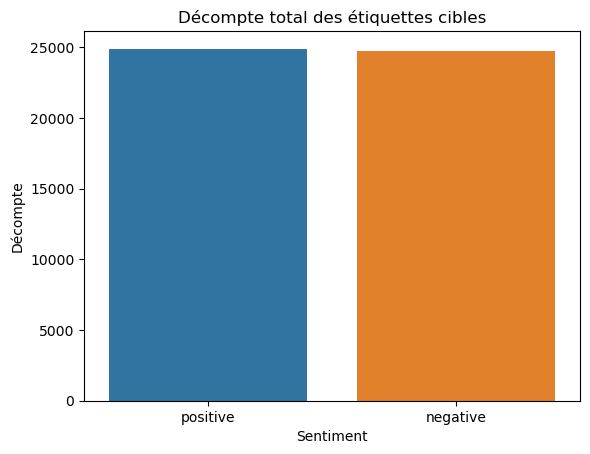

sentiment
positive    24884
negative    24698
Name: count, dtype: int64


In [ ]:
# Compter
sentiment_counts = clean_df['sentiment'].value_counts()

# Graphique
sns.countplot(x=clean_df['sentiment'])
plt.title('Décompte total des étiquettes cibles')
plt.xlabel('Sentiment')
plt.ylabel('Décompte')

# Affichage du graphique
plt.show()

# Impression des décomptes pour chaque étiquette pour l'analyse
print(sentiment_counts)


### 3.2 Longueur de séquence

In [ ]:
# Votre code ici

/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


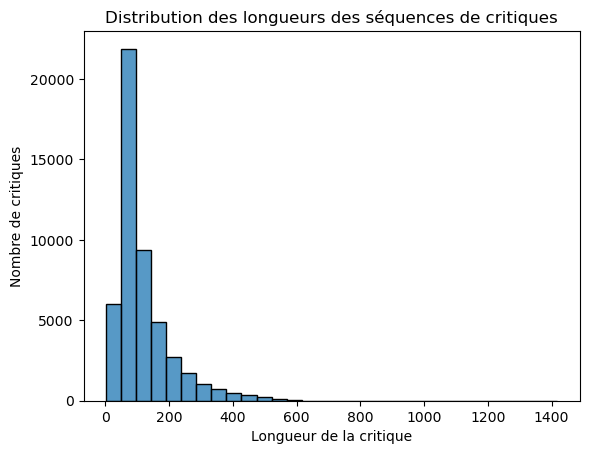

In [ ]:
# Calculer les longueurs des critiques
review_lengths_series = review_lengths(clean_df['clean_review'])

# Créer un histogramme avec Seaborn
sns.histplot(review_lengths_series, bins=30)  # Vous pouvez ajuster le nombre de bins selon vos besoins
plt.title('Distribution des longueurs des séquences de critiques')
plt.xlabel('Longueur de la critique')
plt.ylabel('Nombre de critiques')

# Afficher l'histogramme
plt.show()

In [ ]:
review_lengths_series.describe()

count    49582.000000
mean       118.316244
std         89.005532
min          3.000000
25%         63.000000
50%         88.000000
75%        144.000000
max       1417.000000
Name: clean_review, dtype: float64

/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/canelle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

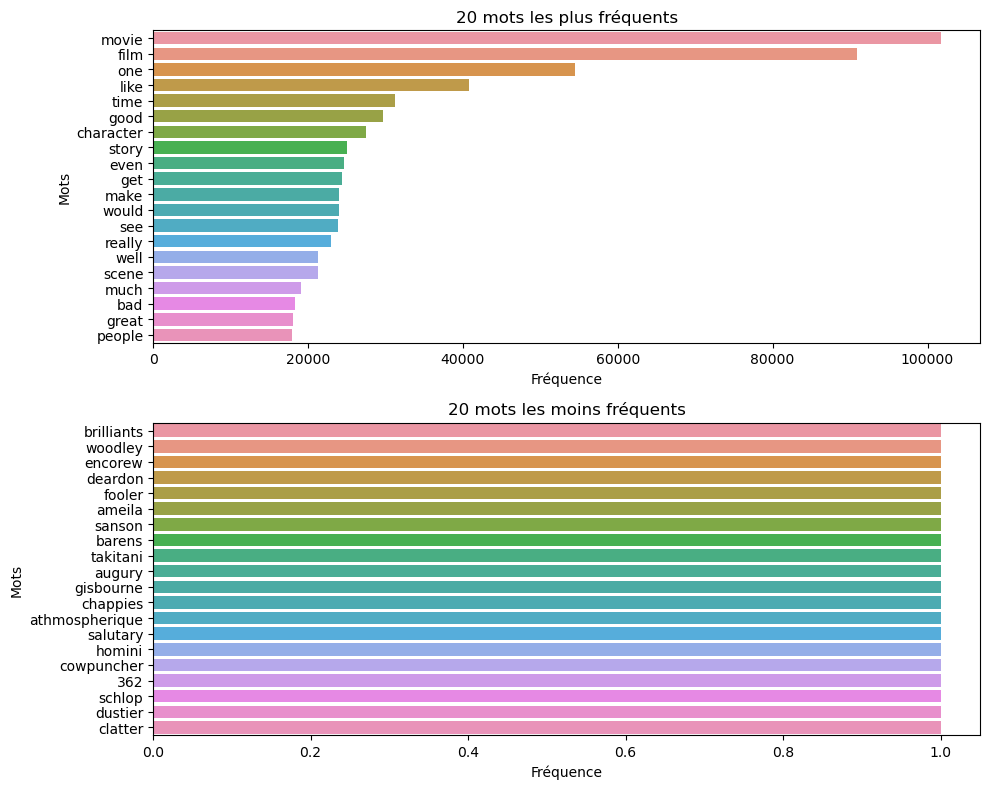

In [ ]:
# Obtenir la fréquence des mots
word_freq_series = word_frequency(clean_df['clean_review'])

# Sélectionner les 20 mots les plus fréquents
top_20_words = word_freq_series.head(20)

# Sélectionner les 20 mots les moins fréquents
bottom_20_words = word_freq_series.tail(20)

# Créer des histogrammes
plt.figure(figsize=(10, 8))

# Histogramme pour les 20 mots les plus fréquents
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, position 1
sns.barplot(x=top_20_words.values, y=top_20_words.index)
plt.title('20 mots les plus fréquents')
plt.xlabel('Fréquence')
plt.ylabel('Mots')

# Histogramme pour les 20 mots les moins fréquents
plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, position 2
sns.barplot(x=bottom_20_words.values, y=bottom_20_words.index)
plt.title('20 mots les moins fréquents')
plt.xlabel('Fréquence')
plt.ylabel('Mots')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les histogrammes
plt.show()

In [ ]:
top_20_words

clean_review
movie        101691
film          90869
one           54526
like          40787
time          31188
good          29654
character     27544
story         25004
even          24669
get           24412
make          24038
would         24036
see           23841
really        22922
well          21276
scene         21251
much          19151
bad           18293
great         18098
people        17882
Name: count, dtype: int64

### 3.3 Fréquence des mots

**Que se passe-t-il si vous souhaitez identifier les bigrammes ? Vous devriez trouver toutes les paires de mots possibles, puis compter les paires de mots uniques. Exemple : `C'est un exemple de phrase pour extraire des bigrammes.`, alors nos bigrammes seraient : `('C'est', 'un'), ('un', 'exemple'), ('exemple', 'de'),('de', 'phrase'),('phrase', 'pour'),('pour', 'extraire'),('extraire', 'des'),('des', 'bigrammes'),('bigrammes', '.')`. Comme nous n'avons qu'une seule phrase et qu'ils sont tous uniques, leur compte serait de 1. Laissez-moi vous montrer comment cela fonctionnerait pour un petit échantillon de notre ensemble de données.**

In [ ]:
from nltk import bigrams
from nltk.tokenize import word_tokenize
from collections import Counter

# Un petit exemple de notre ensemble de données propre avec 100 exemples :
movie_reviews = clean_df["clean_review"][0:100]

# Initialiser une liste vide pour stocker les bigrammes trouvés
all_bigrams = []

# Parcourir chaque critique de film
for review in movie_reviews:
    # Tokeniser le texte
    tokens = word_tokenize(review)

    # Créer des bigrammes pour chaque critique
    bi_grams = list(bigrams(tokens))

    # Étendre la liste de tous les bigrammes
    all_bigrams.extend(bi_grams)

# Compter les occurrences de chaque bigramme à travers toutes les critiques
bigram_counts = Counter(all_bigrams)

# Afficher les résultats
print(bigram_counts)

Counter({('b', 'movie'): 12, ('3', '10'): 7, ('worst', 'movie'): 7, ('wait', 'wait'): 7, ('serial', 'killer'): 6, ('good', 'movie'): 6, ('cold', 'mountain'): 6, ('even', 'though'): 6, ('real', 'life'): 5, ('new', 'york'): 5, ('ever', 'seen'): 5, ('movie', 'like'): 5, ('movie', 'ever'): 5, ('bad', 'movie'): 5, ('number', '23'): 5, ('wan', 'na'): 4, ('waste', 'time'): 4, ('one', 'worst'): 4, ('year', 'old'): 4, ('see', 'movie'): 4, ('special', 'effect'): 4, ('main', 'character'): 4, ('many', 'time'): 4, ('back', 'home'): 4, ('mumbai', 'police'): 4, ('half', 'film'): 4, ('le', 'conseguenze'): 4, ('martial', 'art'): 4, ('movie', 'even'): 4, ('blood', 'surf'): 4, ('last', 'hard'): 4, ('hard', 'men'): 4, ('bad', 'bad'): 4, ('sex', 'violence'): 3, ('worth', 'watching'): 3, ('young', 'woman'): 3, ('make', 'fun'): 3, ('would', 'work'): 3, ('far', 'cry'): 3, ('mad', 'scientist'): 3, ('first', 'three'): 3, ('say', 'movie'): 3, ('good', 'thing'): 3, ('film', 'ever'): 3, ('one', 'bad'): 3, ('story'

# Tâche 4 : Extraction des caractéristiques et préparation de la cible

Dans cette tâche, nous allons préparer nos données textuelles prétraitées pour les rendre utiles à notre modèle de classification.

1-. Nous devons encoder la colonne "sentiment" de notre ensemble de données en valeurs numériques utilisables par le modèle. Vous compléterez la fonction `encode_sentiment` trouvée dans le fichier `nlp_code.py`. Cette fonction prendra notre dataframe avec les colonnes `clean_review` et `sentiment` et renverra un nouveau dataframe avec la colonne `sentiment` encodée en positif = 1 et négatif = 0.
1-. We need to encode the "sentiment" column of our dataset into numerical values that can be used by the model. You will complete the `encode_sentiment` function found in the `nlp_code.py` file. This function will take our dataframe with the columns `clean_review` and `sentiment` and it will return a new dataframe with the `sentiment` column encoded as positive = 1 and negative = 0.

In [ ]:
# Ne pas modifier ceci
new_df = encode_sentiment(clean_df)

> 1.1-. Dans la cellule de code suivante, affichez les 5 premières lignes du nouveau jeu de données.

In [ ]:
# Votre code

In [ ]:
new_df.head()

,clean_review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter love time money visually stunning film ...,1


Nous diviserons notre ensemble de données en un ensemble d'entraînement et un ensemble de test. Pour ce faire, nous utiliserons la bibliothèque scikit-learn pour cette partition. J'ai utilisé un test_size = 0.2 et un random_state = 42.

**Vous devriez conserver cette division tout au long de l'ensemble de votre travail.**

In [ ]:
# Ne pas modifier ceci
X = new_df['clean_review']
y = new_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dans la tâche 3 - point 2, je vous ai demandé de calculer la longueur de séquence pour nos critiques. Comme vous avez pu le constater, la longueur de séquence des critiques n'est pas la même dans l'ensemble de données/corpus. De nombreux modèles ML ont des exigences d'entrée de taille fixe, il est donc essentiel d'identifier une bonne longueur de séquence pour améliorer les performances du modèle.

Comme je l'ai expliqué au début de cette tâche, avant de commencer à entraîner notre modèle, nous devons obtenir une représentation numérique des mots contenus dans nos critiques. Une façon de le faire, sans avoir à prendre en compte les longueurs de séquence, est d'utiliser le "TfidfVectorizer" de scikit-learn. Tf-idf signifie fréquence du terme multipliée par la fréquence inverse du document. Cette représentation numérique pénalise davantage les mots fréquents et donne plus de pertinence aux mots moins fréquents. Vous pouvez trouver plus d'informations sur cette méthode dans la documentation de scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

Nous utiliserons le "TfidVectorizer" de scikit-learn avec les paramètres par défaut, pour obtenir une matrice de caractéristiques TF-IDF. Nous sauvegarderons les données transformées dans de nouvelles variables appelées X_train_tfidf et X_test_tfidf.

Dans votre rapport, vous devrez :

* Expliquer les inconvénients de l'utilisation de cette méthode. **[Discussion]**

* Fournir une méthode alternative que nous aurions pu utiliser pour trouver une meilleure représentation numérique des mots présents dans notre corpus. (Pourquoi pensez-vous que cela pourrait fonctionner mieux ?) **[Discussion]**


AttributeError: 'Series' object has no attribute 'column'

In [ ]:
# Ne pas modifier ceci
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Maintenant que nous avons effectué notre extraction de caractéristiques et encodé nos étiquettes cibles, nous pouvons entraîner un modèle et commencer à prédire le sentiment des critiques.

Nous utiliserons un modèle simple de `Naïve Bayes` pour comprendre à quel point il est facile/difficile de prédire le sentiment de nos critiques de films.

1-. Nous utiliserons le modèle "MultinomialNB" de scikit-learn pour entraîner un modèle de Naïve Bayes sur les données `X_train_tfidf` et les cibles `y_train`. Nous utiliserons les paramètres par défaut de ce modèle.

In [ ]:
# Ne pas modifier ceci
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

2-. Maintenant, nous prédirons le sentiment de nos critiques de l'ensemble d'entraînement.

In [ ]:
# Ne pas modifier ceci
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

3-. En utilisant scikit-learn, calculez l'exactitude de notre modèle sur l'ensemble de test et affichez le rapport de classification.

In [ ]:
# Votre code ici

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Exactitude du modèle:", accuracy, "\n")
print(metrics.classification_report(y_test, y_pred))

Exactitude du modèle: 0.8662902087324795 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4939
           1       0.87      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



4-. En utilisant scikit-learn, affichez la matrice de confusion de notre modèle sous forme de heatmap.

In [ ]:
# Votre code ici

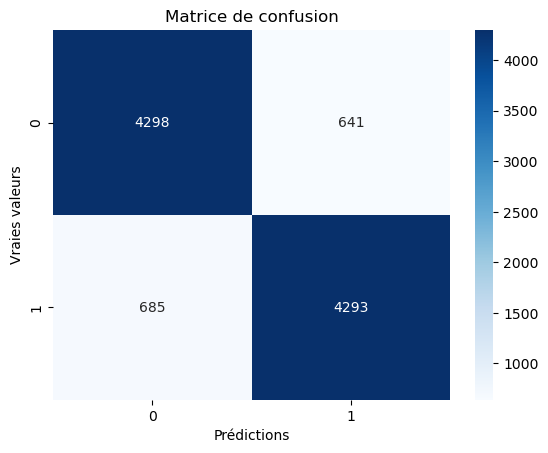

In [ ]:
# Calculer la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion comme une heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

Nous pouvons visualiser les critiques mal classées. Sont-elles particulièrement difficiles à classifier comme positives ou négatives ? (Pas besoin de répondre à cela :) )

In [ ]:
# Ne pas modifier ceci
# Identifier les critiques mal classées
indices_critiques_mal_classees = (y_test != y_pred)
critiques_mal_classees = X_test[indices_critiques_mal_classees]
etiquettes_reelles = y_test[indices_critiques_mal_classees]
etiquettes_predites = y_pred[indices_critiques_mal_classees]

# Afficher les critiques mal classées avec les étiquettes réelles et prédites
for critique, etiquette_reelle, etiquette_predite in zip(critiques_mal_classees, etiquettes_reelles, etiquettes_predites):
    print(f"Critique : {critique}\nÉtiquette Réelle : {etiquette_reelle}\nÉtiquette Prédite : {etiquette_predite}\n")


Critique : national treasure 2004 thoroughly misguided hodge podge plot entanglement borrow nearly every cloak dagger government conspiracy cliché ever written film star nicholas cage benjamin franklin gate precious ask seemingly normal fellow reason lineage like minded misguided fortune hunter decides steal national treasure hidden united state founding father bit subtext background play laughably unintentionally like indiana jones meet patriot film degenerate one misguided whimsy another attempting create stanley goodspeed regurgitation nicholas cage launch whole convoluted mess forward series high octane disconnected misadventure relevancy logic george washington motley crew patriot burying ransom someplace native soil going meticulous plan leaving clue scattered throughout u currency art work something director jon turteltaub never quite get around explaining washington found better usage wealth start country hence left mystery built top enigma already shaky ground time ben appoint

5-. Pour nous aider à expliquer les prédictions faites par notre modèle, nous allons explorer un nouvel outil d'explicabilité des modèles appelé `LIME`. LIME (Local Interpretable Model-agnostic Explanations) est une technique utilisée pour expliquer les prédictions des modèles d'apprentissage automatique en les approximant avec un modèle localement interprétable. Pour ce faire, vous devrez compléter la fonction `explain_prediction` dans `nlp_code.py`. **Remarque : LIME est un outil puissant pour générer des explications locales, mais gardez à l'esprit qu'il fournit une approximation du processus de prise de décision du modèle. Il perturbe les données d'entrée pour comprendre comment le modèle se comporte localement, et les explications ne représentent pas toujours parfaitement le comportement global du modèle.**

In [ ]:
# Ne pas modifier ceci
# Afficher les informations
# Obtenir les indices de l'ensemble de test
indices_ensemble_test = X_test.index

# Trouver l'indice du premier élément dans l'ensemble de test en accédant au premier élément de indices_ensemble_test
idx = indices_ensemble_test[0]
exp, prob = explain_instance(tfidf_vectorizer, naive_bayes_classifier, X_test, idx=idx, num_features=10)
noms_classes = ['négatif', 'positif']
print('Identifiant du document : %d' % idx)
print('Probabilité (Positif) =', prob)
print('Classe réelle : %s' % noms_classes[y_test[idx]])

# Afficher l'explication dans le notebook
exp.show_in_notebook(text=True)

Identifiant du document : 29171
Probabilité (Positif) = 0.0615
Classe réelle : négatif


**Dans votre rapport, ajoutez la visualisation obtenue et donnez une interprétation de celle-ci. [Discussion]**

# Tâche 5 : Exploration d'un modèle Transformer

Dans cette section, je voudrais que vous `essayiez de` surpasser notre modèle précédent avec un modèle beaucoup plus complexe. Vous utiliserez un modèle transformateur appelé `distilBERT` pour cela (vous pouvez utiliser la bibliothèque HuggingFace pour l'implémenter). Dans votre rapport, je voudrais que vous :

1-. Mettez en œuvre le modèle distilBERT, entraînez-le et évaluez-le sur le même jeu d'entraînement que notre classifieur Naïve Bayes. Vous pouvez sauvegarder les ensembles de données prétraités sous forme de fichiers csv (avec les noms de colonnes text et labels) puis les charger à l'aide de la méthode load_dataset de la bibliothèque datasets. Vous devez faire attention au formatage des entrées pour ce modèle transformateur (son nom est : distilbert-base-uncased).

2-. Explorez 2 façons différentes d'ajuster le modèle (# epochs, learning rate, weight decay, etc.) pour améliorer les performances de classification (incluez le(s) tableau(x) des résultats obtenus par rapport aux approches explorées, indiquez la configuration qui a produit les meilleurs résultats). Je veux connaître en détail la méthodologie que vous avez suivie pour améliorer les performances du modèle. Par conséquent, j'attends une discussion raisonnable sur les approches que vous avez prises (je retirerai des points pour les changements aléatoires des hyperparamètres du modèle). **[Discussion]**

3-. Vous devrez inclure dans votre rapport votre précision("accuracy" et "precission"), rappel et scores F1 (discutez-les et comparez-les). De plus, vous devez inclure l'image de votre matrice de confusion sous forme de heatmap (meilleur modèle). Rapportez si les résultats obtenus sont bien meilleurs que ceux obtenus avec le classifieur Naïve Bayes. (Soutenez vos commentaires en comparant les scores et les heatmaps, j'attends une bonne quantité de discussion). **[Discussion]**


**Avertissements : Cette partie de l'assignation doit être effectuée dans Google Colab avec un environnement GPU, car les LLM sont difficiles à entraîner sur un ordinateur portable ou un PC classique (si vous avez un ordinateur puissant, n'hésitez pas à essayer). Je ne vous demande pas de vous acharner à améliorer de manière extrême un modèle qui ne s'améliore pas ou à suraméliorer un modèle qui fonctionne déjà mieux que le Naïve Bayes (concentrez vos efforts dans les limites des exigences attendues). Mon objectif est de vous donner de l'expérience dans l'entraînement de ce type de modèle et de vous faire remarquer combien de temps cela prend pour les entraîner. Parfois, facile, rapide et explicable/interprétable est meilleur que complexe, lent et difficile à expliquer/interpréter.**

Voici un [tutoriel](https://huggingface.co/blog/sentiment-analysis-python)

In [3]:
import random
import numpy as np
import torch
import transformers

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    transformers.set_seed(seed)

set_seed(42)

In [4]:
# Créer des DataFrames pour l'entraînement et le test
train_df = pd.DataFrame({'text': X_train, 'labels': y_train})
test_df = pd.DataFrame({'text': X_test, 'labels': y_test})

# Sauvegarder les DataFrames en fichiers CSV
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

NameError: ignored

In [5]:
# Activate GPU for faster training by clicking on 'Runtime' > 'Change runtime type' and then selecting GPU as the Hardware accelerator
# Then check if GPU is available
import torch
torch.cuda.is_available()

True

Références :
- https://huggingface.co/blog/sentiment-analysis-python
- https://colab.research.google.com/drive/1t-NJadXsPTDT6EWIR0PRzpn5o8oMHzp3?usp=sharing#scrollTo=oB-ikgCN77wP

In [8]:
!pip install datasets
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 3.2 MB/s eta 0:00:00


In [6]:
# Charger les ensembles de données
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'train': 'train_dataset.csv', 'test': 'test_dataset.csv'})

In [7]:
# Tokenisation des données avec DistilBert
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)


In [8]:
# Création du modèle DistilBERT
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.257100,0.246626,0.903701,0.906290,0.885862,0.927682
2,0.178200,0.267170,0.912474,0.911699,0.923537,0.900161
3,0.113600,0.338157,0.912373,0.913455,0.905787,0.921254


TrainOutput(global_step=7440, training_loss=0.19779171123299547, metrics={'train_runtime': 5904.4393, 'train_samples_per_second': 20.153, 'train_steps_per_second': 1.26, 'total_flos': 1.576295810307072e+16, 'train_loss': 0.19779171123299547, 'epoch': 3.0})

In [10]:
trainer.evaluate()

{'eval_loss': 0.33815687894821167,
 'eval_accuracy': 0.9123726933548452,
 'eval_f1': 0.9134548351757793,
 'eval_precision': 0.9057870827572585,
 'eval_recall': 0.9212535154680594,
 'eval_runtime': 163.6838,
 'eval_samples_per_second': 60.586,
 'eval_steps_per_second': 3.788,
 'epoch': 3.0}

In [11]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.071000,0.444207,0.908037,0.909344,0.900039,0.918843
2,0.048400,0.481473,0.909549,0.910879,0.901121,0.920852


TrainOutput(global_step=4960, training_loss=0.05899665124954716, metrics={'train_runtime': 3934.2264, 'train_samples_per_second': 20.164, 'train_steps_per_second': 1.261, 'total_flos': 1.050863873538048e+16, 'train_loss': 0.05899665124954716, 'epoch': 2.0})

In [12]:
trainer.evaluate()


{'eval_loss': 0.48147323727607727,
 'eval_accuracy': 0.9095492588484421,
 'eval_f1': 0.9108792846497764,
 'eval_precision': 0.901120503243562,
 'eval_recall': 0.9208517476898352,
 'eval_runtime': 163.4466,
 'eval_samples_per_second': 60.674,
 'eval_steps_per_second': 3.793,
 'epoch': 2.0}

In [13]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.034900,0.550641,0.907028,0.908149,0.900791,0.915629
2,0.030000,0.601994,0.907734,0.909019,0.899980,0.918240


TrainOutput(global_step=4960, training_loss=0.036216631627851915, metrics={'train_runtime': 3935.4762, 'train_samples_per_second': 20.158, 'train_steps_per_second': 1.26, 'total_flos': 1.050863873538048e+16, 'train_loss': 0.036216631627851915, 'epoch': 2.0})

In [14]:
trainer.evaluate()

{'eval_loss': 0.6019939184188843,
 'eval_accuracy': 0.9077341938086114,
 'eval_f1': 0.9090185940141194,
 'eval_precision': 0.8999803110848592,
 'eval_recall': 0.918240257131378,
 'eval_runtime': 163.522,
 'eval_samples_per_second': 60.646,
 'eval_steps_per_second': 3.792,
 'epoch': 2.0}

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Effectuer des prédictions sur l'ensemble de test
predictions = trainer.predict(tokenized_datasets["test"])

# Obtenir les prédictions de classe
pred_labels = np.argmax(predictions.predictions, axis=-1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true=predictions.label_ids, y_pred=pred_labels)

# Afficher la matrice de confusion
print(conf_matrix)


[[4431  508]
 [ 407 4571]]


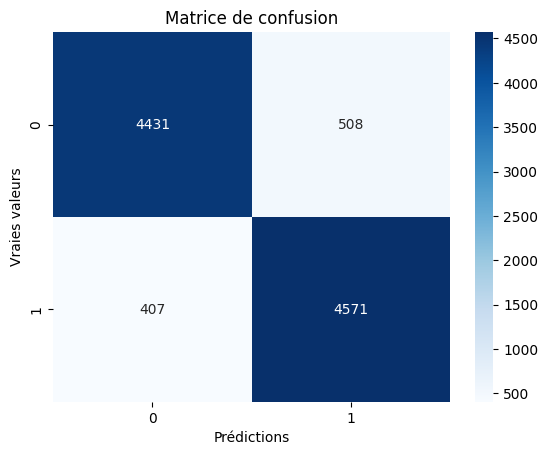

In [16]:

# Afficher la matrice de confusion comme une heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()